In [1]:
import pandas as pd

# Read data
data = pd.read_csv('BRCA_Tang_log2_GCH1_Metabolites_tumor.csv')

# Calculate the correlation between GCH1 and other metabolites
correlations = data.corr(numeric_only=True)['GCH1'].drop('GCH1')  # Remove GCH1's own correlation

# Sort by absolute value of correlation coefficient in descending order
correlations_sorted = correlations.reindex(correlations.abs().sort_values(ascending=False).index)
print(correlations_sorted)


butyrylcarnitine                  0.713441
isoleucine                        0.636814
leucine                           0.616122
pentaethylene glycol             -0.585494
heptaethylene glycol             -0.577743
                                    ...   
docosahexaenoate (DHA; 22:6n3)    0.008668
carnitine                         0.008660
lysine                           -0.006664
caproate (6:0)                   -0.006358
1-linoleoylglycerol (18:2)       -0.004356
Name: GCH1, Length: 384, dtype: float64


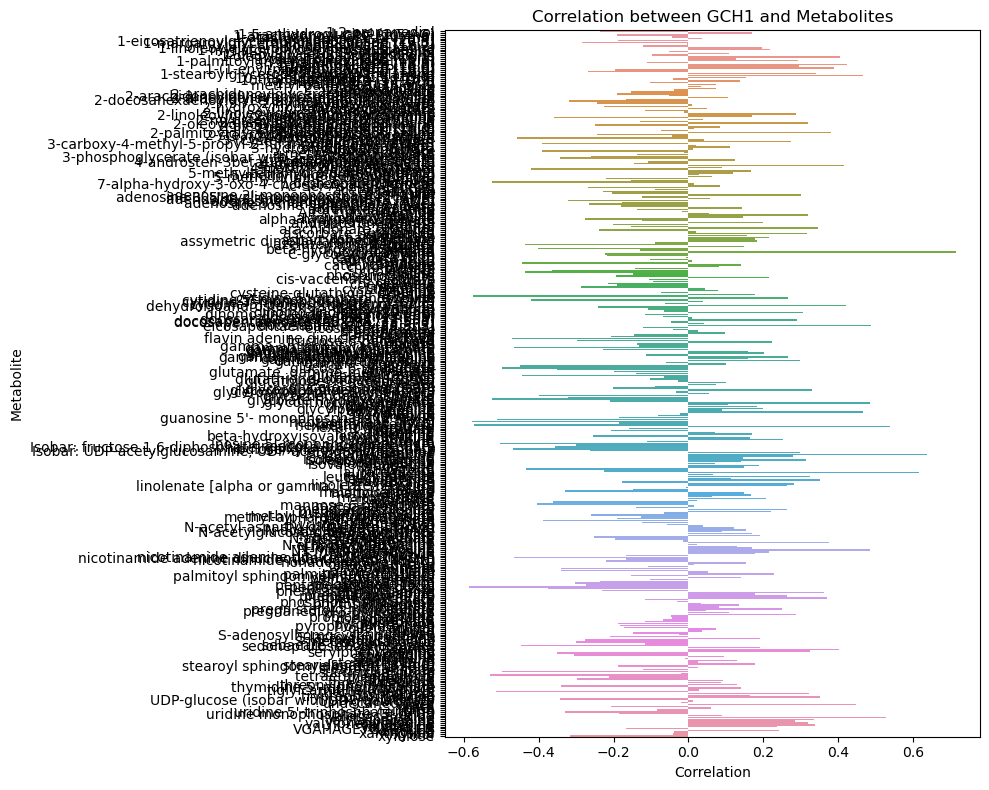

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation of GCH1 with metabolites extracted and converted to data frame
corr_df = correlations.to_frame().reset_index()
corr_df.columns = ['Metabolite', 'Correlation']


plt.figure(figsize=(10, 8))
sns.barplot(data=corr_df, x='Correlation', y='Metabolite')
plt.title('Correlation between GCH1 and Metabolites')
plt.tight_layout()
plt.show()

correlations.to_csv('GCH1_metabolites_correlations.csv', header=True)
